## **Exp no:**
## **Date:**
# <center>**Decision Tree**</center>

## **Aim:**
####The aim  is to understand the working principles of Decision Tree Classification and Regression, implement them in Python using the sklearn library, and evaluate their performance on real-world datasets.

##**Importing the Header**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error
from sklearn.datasets import load_iris, fetch_california_housing

# **Decision Tree Classification**

### **Importing the dataset**

In [3]:
iris = load_iris()
X = iris.data
y = iris.target
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Train the Decision Tree Classifier**


In [4]:
classifier = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

# **Evaluate the model**

In [5]:
y_pred=classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification report :\n",classification_report(y_test,y_pred))

Accuracy: 1.0
Classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



  ## **Visualize the decision tree**



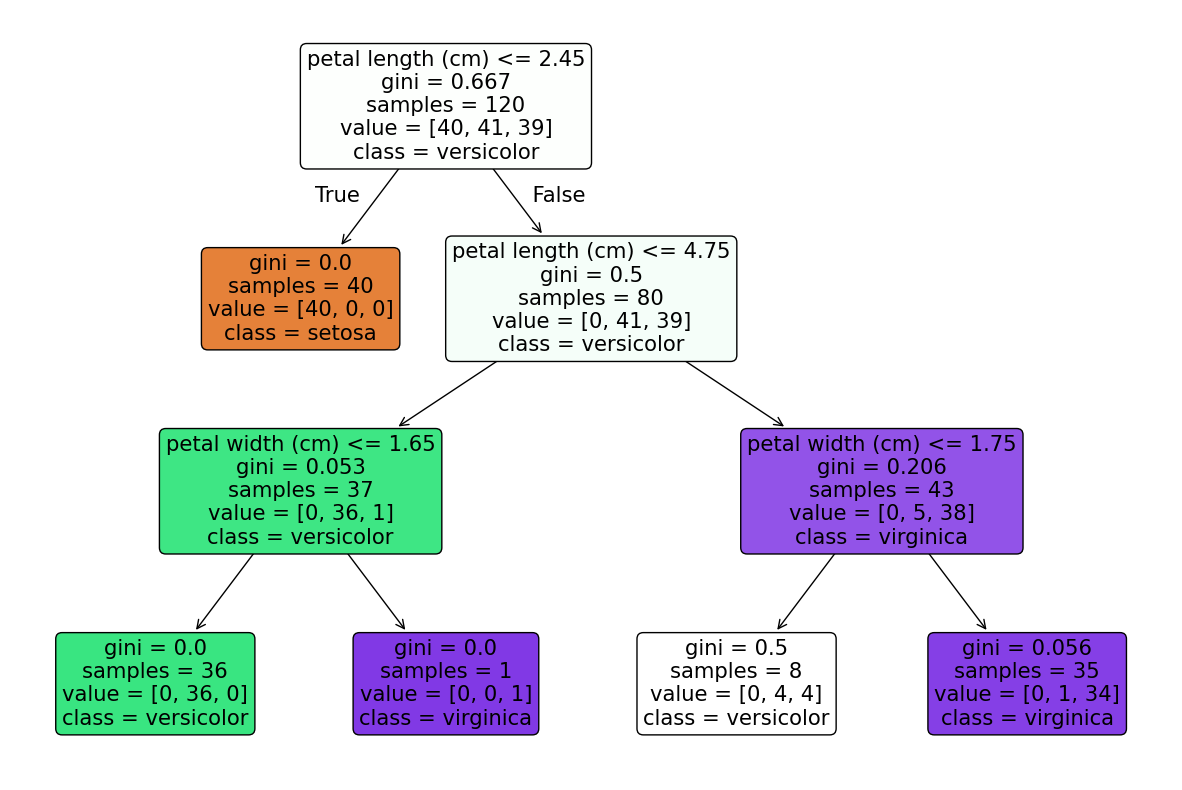

In [6]:
plt.figure(figsize=(15, 10))
plot_tree(classifier, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True)
plt.show()

# **DATA 2**

# **Decision Tree Regression**

In [7]:
housing = fetch_california_housing()
X = housing.data
y = housing.target

In [8]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

# Convert to a pandas DataFrame
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['Target'] = housing.target
print(df.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


In [30]:
df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
Target,0


# **no null values**

In [9]:
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
for feature in features:
    formula = f"Target ~ {feature}"
    mod = smf.ols(formula, data=df).fit()
    aov = anova_lm(mod)
    print(f"ANOVA for {feature}:")
    print(aov)
    print("\n" + "-"*40 + "\n")


ANOVA for MedInc:
               df        sum_sq       mean_sq             F  PR(>F)
MedInc        1.0  13011.851252  13011.851252  18556.571631     0.0
Residual  20638.0  14471.346942      0.701199           NaN     NaN

----------------------------------------

ANOVA for HouseAge:
               df        sum_sq     mean_sq           F        PR(>F)
HouseAge      1.0    306.610949  306.610949  232.841479  2.761861e-52
Residual  20638.0  27176.587245    1.316823         NaN           NaN

----------------------------------------

ANOVA for AveRooms:
               df        sum_sq     mean_sq           F         PR(>F)
AveRooms      1.0    634.539851  634.539851  487.757462  7.569242e-107
Residual  20638.0  26848.658343    1.300933         NaN            NaN

----------------------------------------

ANOVA for AveBedrms:
                df        sum_sq    mean_sq          F        PR(>F)
AveBedrms      1.0     59.939149  59.939149  45.108576  1.912589e-11
Residual   20638.0  27423.2

### **From the above anova test all the predictors have p_value< 0.05 so good predictor**

In [10]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df.drop(columns=['Target'])
X = sm.add_constant(X)
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)


      Feature           VIF
0       const  17082.623698
1      MedInc      2.501295
2    HouseAge      1.241254
3    AveRooms      8.342786
4   AveBedrms      6.994995
5  Population      1.138125
6    AveOccup      1.008324
7    Latitude      9.297624
8   Longitude      8.962263


###**From the above we infer that all predictors have vif less than 10 so no need to drop any predictors**

In [11]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Train the Decision Tree REGRESSOR**



In [12]:
regressor = DecisionTreeRegressor(criterion='squared_error', max_depth=5, random_state=42)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

### **Evaluate the Model**

In [13]:
import numpy as np
bins = np.percentile(y_test, [33, 66])  # Divide into 3 equal parts
labels = [0, 1, 2]  # Low, Medium, High

# Convert continuous values into categories
y_test_binned = np.digitize(y_test, bins)
y_pred_binned = np.digitize(y_pred, bins)

cm = confusion_matrix(y_test_binned, y_pred_binned)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Binned Predictions)')
plt.show()


ValueError: Found input variables with inconsistent numbers of samples: [4128, 30]

## **Visualize the Decision Tree**


In [1]:
plt.figure(figsize=(400, 400))
plot_tree(regressor, feature_names=housing.feature_names, filled=True)
plt.show()


NameError: name 'plt' is not defined